In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
csv_file_name='Bowlus_tx_pos.csv'
df = pd.read_csv(csv_file_name)
tx_x = df['x'][2]/0.05
tx_y = -df['y'][2]/0.05

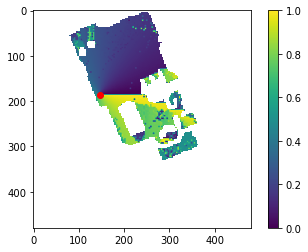

In [18]:
csv_file_name='Bowlus_Tx_3_beam_search.csv'
df = pd.read_csv(csv_file_name)
df = df[['aoaAzResult_1', 'rxPosInd_1', 'rxPosInd_2']]
df['rxPosInd_1'] = (df['rxPosInd_1'])*3-2
df['rxPosInd_2'] = (df['rxPosInd_2'])*3-2
angle = np.empty((480,480))
angle[:, :] = np.NaN

for index, row in df.iterrows():
    angle[int(row['rxPosInd_1']-1), int(row['rxPosInd_2']-1)] = row['aoaAzResult_1']
    angle[int(row['rxPosInd_1']-1), int(row['rxPosInd_2'])] = row['aoaAzResult_1']
    angle[int(row['rxPosInd_1']-1), int(row['rxPosInd_2']+1)] = row['aoaAzResult_1']

    angle[int(row['rxPosInd_1']), int(row['rxPosInd_2']-1)] = row['aoaAzResult_1']
    angle[int(row['rxPosInd_1']), int(row['rxPosInd_2'])] = row['aoaAzResult_1']
    angle[int(row['rxPosInd_1']), int(row['rxPosInd_2']+1)] = row['aoaAzResult_1']

    angle[int(row['rxPosInd_1']+1), int(row['rxPosInd_2']-1)] = row['aoaAzResult_1']
    angle[int(row['rxPosInd_1']+1), int(row['rxPosInd_2'])] = row['aoaAzResult_1']
    angle[int(row['rxPosInd_1']+1), int(row['rxPosInd_2']+1)] = row['aoaAzResult_1']

plt.imshow(angle)
plt.scatter([tx_x],[tx_y],c ='r')
plt.colorbar()
plt.savefig('channel_modeling_aoa.png', dpi=500)